In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
df_new=df.iloc[:,1:]

In [4]:
df_new.head(5)

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Dropping the priceUSD column and storing it in 'y'

In [5]:
df1=df_new.reset_index(drop=True)
n=df1.drop('priceUSD',1)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_12616\646315669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n=df1.drop('priceUSD',1)


In [6]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Reading the RobustScaler PCA dataset

In [7]:
minmaxPCA=pd.read_csv('PCA_RobustScaler_data2.csv')
#Adding the y column to this dataset
combined_data=minmaxPCA.assign(priceUSD=y)
combined_data.head()

,Unnamed: 0,0,priceUSD
0,0,17.457793,0.0495
1,1,14.710055,0.0726
2,2,16.441571,0.0859
3,3,25.908801,0.0783
4,4,15.769526,0.0767


### Dropping the first unnamed column

In [8]:
finaldata = combined_data.iloc[: , 1:]
finaldata

,0,priceUSD
0,17.457793,0.0495
1,14.710055,0.0726
2,16.441571,0.0859
3,25.908801,0.0783
4,15.769526,0.0767
...,...,...
1551,-2.571508,393.7880
1552,-2.533001,386.2650
1553,-2.502721,379.4510
1554,-2.507886,384.7020


In [9]:
X = finaldata.iloc[:, :-1].values
y = finaldata.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Training the Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Printing R2 score

In [12]:
r_squared = regressor.score(X, y)
print(r_squared)

0.03780473820462993


In [13]:
y_pred = regressor.predict(X_test)

### Displaying adjusted R2

In [14]:
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.03718556493449132

### Accuracy on linear regression

In [15]:
regressor.score(X_train,y_train)
pred=regressor.predict(X_test)
regressor.score(X_test,y_test)

0.02511103729266073

### Visualising the Training set results

### Visualising the Test set results

### Gradient boosting Model and its parameter

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [17]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [18]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=4, subsample=0.9)

 The best score across ALL searched params:
 0.12559621698778362

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


### Training the Random forest regression model on the whole dataset

In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Randomforest regressor using GridSearchCV 

In [20]:
from sklearn.metrics import r2_score
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    return y_test,y_predict

In [21]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------
R2 score: -0.23055111828863617
Best Score: -0.021007171437236828
Best params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 20}
Loop:  1
--------------
R2 score: -0.11646648652423042
Best Score: -0.021493735777240165
Best params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}
Loop:  2
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: -0.1212829111859921
Best Score: -0.01510355221836308
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 30}
Loop:  3
--------------
R2 score: -0.15692164486450122
Best Score: -0.01487976763811134
Best params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}
Loop:  4
--------------
R2 score: -0.1583796294960811
Best Score: -0.026179928229639347
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 30}


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


### Building the model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 7ms/step - loss: 170.0820 - mean_absolute_error: 165.5500 - val_loss: 129.3413 - val_mean_absolute_error: 128.0008
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 164.1283 - mean_absolute_error: 163.0869 - val_loss: 123.3828 - val_mean_absolute_error: 121.9086
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 160.2397 - mean_absolute_error: 158.9791 - val_loss: 123.0952 - val_mean_absolute_error: 121.8866
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 159.8518 - mean_absolute_error: 158.7847 - val_loss: 122.9938 - val_mean_absolute_error: 121.9455
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 159.6403 - mean_absolute_error: 158.6239 - val_loss: 122.6937 - val_mean_absolute_error: 121.8749
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 159.5618 - mean_absolute_error: 158.7073 - val_loss: 122.6067 - val_mean

Epoch 49/100
63/63 [==============================] - 0s 2ms/step - loss: 159.0646 - mean_absolute_error: 158.6792 - val_loss: 122.3302 - val_mean_absolute_error: 121.9788
Epoch 50/100
63/63 [==============================] - 0s 2ms/step - loss: 159.0952 - mean_absolute_error: 158.7425 - val_loss: 122.9441 - val_mean_absolute_error: 122.5231
Epoch 51/100
63/63 [==============================] - 0s 2ms/step - loss: 158.8540 - mean_absolute_error: 158.4925 - val_loss: 122.2331 - val_mean_absolute_error: 121.8394
Epoch 52/100
63/63 [==============================] - 0s 2ms/step - loss: 159.1954 - mean_absolute_error: 158.8033 - val_loss: 122.5281 - val_mean_absolute_error: 122.1775
Epoch 53/100
63/63 [==============================] - 0s 2ms/step - loss: 159.0537 - mean_absolute_error: 158.7057 - val_loss: 123.1517 - val_mean_absolute_error: 122.6538
Epoch 54/100
63/63 [==============================] - 0s 2ms/step - loss: 159.0006 - mean_absolute_error: 158.6050 - val_loss: 122.8848 - va

63/63 [==============================] - 0s 2ms/step - loss: 158.8602 - mean_absolute_error: 158.5850 - val_loss: 122.9157 - val_mean_absolute_error: 122.6264
Epoch 97/100
63/63 [==============================] - 0s 2ms/step - loss: 158.9258 - mean_absolute_error: 158.6609 - val_loss: 122.6275 - val_mean_absolute_error: 122.3611
Epoch 98/100
63/63 [==============================] - 0s 2ms/step - loss: 159.0067 - mean_absolute_error: 158.6540 - val_loss: 122.3796 - val_mean_absolute_error: 122.1374
Epoch 99/100
63/63 [==============================] - 0s 2ms/step - loss: 158.8193 - mean_absolute_error: 158.5926 - val_loss: 122.2858 - val_mean_absolute_error: 122.0638
Epoch 100/100
63/63 [==============================] - 0s 2ms/step - loss: 158.8806 - mean_absolute_error: 158.5918 - val_loss: 122.5755 - val_mean_absolute_error: 122.1878


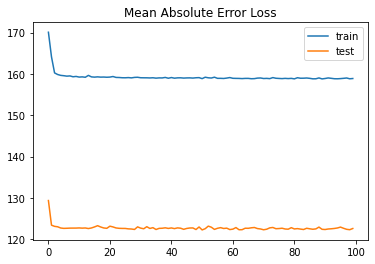

In [15]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 2

In [16]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [17]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [18]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 170.0850 - mean_absolute_error: 165.5279 - val_loss: 129.2054 - val_mean_absolute_error: 127.8172
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 162.5196 - mean_absolute_error: 161.3311 - val_loss: 123.1477 - val_mean_absolute_error: 121.8848
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 159.9338 - mean_absolute_error: 158.7617 - val_loss: 123.0958 - val_mean_absolute_error: 122.0348
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 159.6154 - mean_absolute_error: 158.6154 - val_loss: 122.9276 - val_mean_absolute_error: 121.9875
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 159.5583 - mean_absolute_error: 158.6802 - val_loss: 122.8662 - val_mean_absolute_error: 122.0027
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 159.4879 - mean_absolute_error: 158.6529 - val_loss: 122.8770 - val_mean

Epoch 49/100
63/63 [==============================] - 0s 2ms/step - loss: 158.9341 - mean_absolute_error: 158.5844 - val_loss: 122.4687 - val_mean_absolute_error: 122.0996
Epoch 50/100
63/63 [==============================] - 0s 2ms/step - loss: 159.0308 - mean_absolute_error: 158.6332 - val_loss: 122.7098 - val_mean_absolute_error: 122.3246
Epoch 51/100
63/63 [==============================] - 0s 2ms/step - loss: 159.0218 - mean_absolute_error: 158.6297 - val_loss: 122.6368 - val_mean_absolute_error: 122.2380
Epoch 52/100
63/63 [==============================] - 0s 2ms/step - loss: 159.0005 - mean_absolute_error: 158.5843 - val_loss: 122.5647 - val_mean_absolute_error: 122.1360
Epoch 53/100
63/63 [==============================] - 0s 2ms/step - loss: 158.9841 - mean_absolute_error: 158.5926 - val_loss: 122.7479 - val_mean_absolute_error: 122.3661
Epoch 54/100
63/63 [==============================] - 0s 2ms/step - loss: 158.9503 - mean_absolute_error: 158.5795 - val_loss: 122.4044 - va

63/63 [==============================] - 0s 2ms/step - loss: 158.8465 - mean_absolute_error: 158.5535 - val_loss: 122.6975 - val_mean_absolute_error: 122.4145
Epoch 97/100
63/63 [==============================] - 0s 2ms/step - loss: 158.9054 - mean_absolute_error: 158.5743 - val_loss: 122.5415 - val_mean_absolute_error: 122.2408
Epoch 98/100
63/63 [==============================] - 0s 2ms/step - loss: 158.8001 - mean_absolute_error: 158.5117 - val_loss: 122.5493 - val_mean_absolute_error: 122.2679
Epoch 99/100
63/63 [==============================] - 0s 2ms/step - loss: 158.8624 - mean_absolute_error: 158.5538 - val_loss: 122.5668 - val_mean_absolute_error: 122.2728
Epoch 100/100
63/63 [==============================] - 0s 2ms/step - loss: 158.9202 - mean_absolute_error: 158.6194 - val_loss: 122.3489 - val_mean_absolute_error: 122.0736


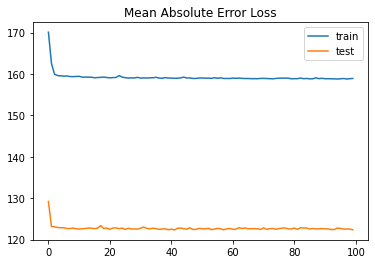

In [19]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 3

In [20]:
#mean_squared_logarithmic_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [21]:
classifier.compile(optimizer='adam',loss='mean_squared_logarithmic_error',metrics=['mse'])

In [22]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 5ms/step - loss: 19.7879 - mse: 94895.4922 - val_loss: 14.6858 - val_mse: 65642.4688
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 15.7556 - mse: 94895.1797 - val_loss: 13.5160 - val_mse: 65642.4688
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3504 - mse: 94895.2109 - val_loss: 13.4632 - val_mse: 65642.4688
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 15.3370 - mse: 94895.1953 - val_loss: 13.4631 - val_mse: 65642.4688
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3370 - mse: 94895.2109 - val_loss: 13.4627 - val_mse: 65642.4688
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.1953 - val_loss: 13.4631 - val_mse: 65642.4688
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.1953 - val_loss: 13.4624 - val_mse: 65642.4688
Epoch 8/100
6

Epoch 59/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.2109 - val_loss: 13.4624 - val_mse: 65642.4688
Epoch 60/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.2188 - val_loss: 13.4630 - val_mse: 65642.4688
Epoch 61/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.2188 - val_loss: 13.4629 - val_mse: 65642.4688
Epoch 62/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.1953 - val_loss: 13.4633 - val_mse: 65642.4688
Epoch 63/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3370 - mse: 94895.1953 - val_loss: 13.4625 - val_mse: 65642.4688
Epoch 64/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.2031 - val_loss: 13.4632 - val_mse: 65642.4688
Epoch 65/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.2188 - val_loss: 13.4629 - val_mse: 65642.4688
Epoch 

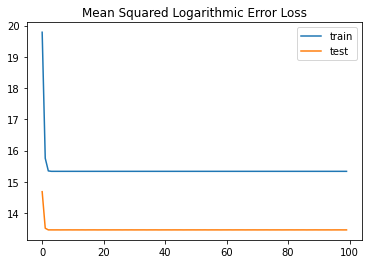

In [23]:
# plot loss during training
plt.title('Mean Squared Logarithmic Error Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

###  Model 4

In [24]:
# define model for MSE Loss
#mean_squared_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [25]:
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [26]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=10,epochs=100)

Epoch 1/100
100/100 [==============================] - 1s 3ms/step - loss: 93517.3203 - mse: 93512.5781 - val_loss: 58754.5391 - val_mse: 58750.0586
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 68222.8516 - mse: 68216.0547 - val_loss: 50480.6758 - val_mse: 50472.8984
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 65484.7930 - mse: 65477.4141 - val_loss: 48907.8867 - val_mse: 48900.4062
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 65429.6953 - mse: 65422.2266 - val_loss: 48095.2305 - val_mse: 48087.6484
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 65391.5859 - mse: 65384.1367 - val_loss: 49110.8750 - val_mse: 49103.2773
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 65209.6797 - mse: 65201.8750 - val_loss: 48320.8672 - val_mse: 48312.8281
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 65088.3750 - mse: 65080.2031 - 

Epoch 56/100
100/100 [==============================] - 0s 2ms/step - loss: 62608.9922 - mse: 62580.6602 - val_loss: 46165.7305 - val_mse: 46137.5078
Epoch 57/100
100/100 [==============================] - 0s 2ms/step - loss: 62532.5859 - mse: 62504.3203 - val_loss: 45971.3008 - val_mse: 45943.1797
Epoch 58/100
100/100 [==============================] - 0s 2ms/step - loss: 62481.8984 - mse: 62453.7539 - val_loss: 45629.6602 - val_mse: 45601.5938
Epoch 59/100
100/100 [==============================] - 0s 2ms/step - loss: 62653.7070 - mse: 62625.6055 - val_loss: 46900.2227 - val_mse: 46871.9961
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 62398.1094 - mse: 62369.9180 - val_loss: 45712.0820 - val_mse: 45684.0156
Epoch 61/100
100/100 [==============================] - 0s 2ms/step - loss: 62474.0508 - mse: 62445.9883 - val_loss: 46983.7266 - val_mse: 46955.5820
Epoch 62/100
100/100 [==============================] - 0s 2ms/step - loss: 62501.1992 - mse: 62473.

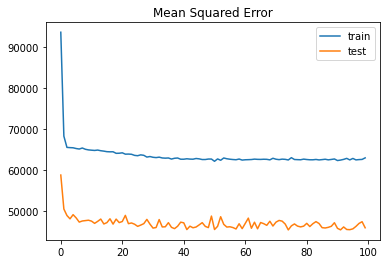

In [27]:
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()